# Problema 3
## Model that predicts profit
### El objetivo es saber si se presentaran perdidas

In [1]:
import pandas as pd
#import pandas_datareader.data as web
import numpy as np
import datetime
import matplotlib.pyplot as plt
import scipy.stats as st
%matplotlib inline
#pd.set_option('display.notebook_repr_html', True)
#pd.set_option('display.max_columns', 11)
#pd.set_option('display.max_rows', 10)
#pd.set_option('display.width', 78)
pd.set_option('precision', 3)

In [2]:
data=pd.read_excel('bases de datos/dbp3.xlsx')

In [3]:
clasified=list(map(lambda n:data.loc[data['int_rate']==n,:],np.unique(data['int_rate'])))

In [4]:
amounts=list(map(lambda n: np.sum(n.iloc[:,4]),clasified))

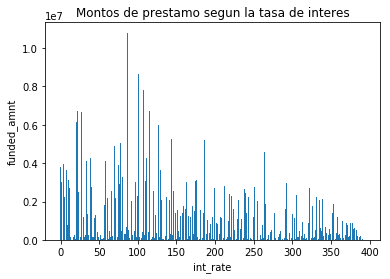

In [154]:
plt.bar(range(len(amounts)),amounts)
plt.title('Montos de prestamo segun la tasa de interes')
plt.ylabel('funded_amnt')
plt.xlabel('int_rate')
plt.show()

### Probabilidad de default dependiento la tasa de interes

In [6]:
default_probability=list(map(lambda n:np.count_nonzero(n.iloc[:,0]<0)/len(n.iloc[:,0]),clasified))

In [145]:
labels=list(map(lambda n: str(n),np.unique(data['int_rate'])))

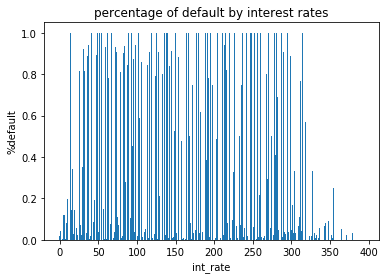

In [153]:
plt.bar(range(len(np.unique(data['int_rate']))),default_probability)
plt.title('percentage of default by interest rates')
plt.ylabel('%default')
plt.xlabel('int_rate')
plt.show()


### Tasas de interes con 100% de probabilidad de default

In [108]:
intrates=pd.DataFrame(np.unique(data['int_rate'])[np.array(default_probability)==1])

In [105]:
t=np.arange(len(amounts))[np.array(default_probability)==1]

### Grado del prestamo que tuvo, en una tasa de interes, el 100% de default

In [107]:
loangrades=pd.DataFrame(list(map(lambda n:np.mean(clasified[n].iloc[:,3]),np.arange(len(amounts))[np.array(default_probability)==1])))

In [115]:
df=pd.concat([intrates,loangrades],axis=1)
df.columns=['int_rate','loangrades']
df.index.name='type of loan that has a 100% default and its int_rate'
df

,int_rate,loangrades
type of loan that has a 100% default and its int_rate,,
0,0.071,1.0
1,0.074,2.0
2,0.090,7.0
3,0.095,7.0
4,0.096,9.0
5,0.097,6.0
6,0.098,8.0
7,0.100,7.0
8,0.103,11.0


### Probabilidad de default segun el grado del prestamo

In [12]:
clasified_by_loangrade=list(map(lambda n:data.loc[data['loangrade']==n,:],np.unique(data['loangrade'])))

In [13]:
default_probability_by_loangrade=list(map(lambda n:np.count_nonzero(n.iloc[:,0]<0)/len(n.iloc[:,0]),clasified_by_loangrade))

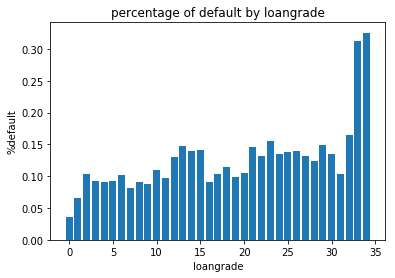

In [117]:
plt.bar(range(35),default_probability_by_loangrade)
plt.title('percentage of default by loangrade')
plt.xlabel('loangrade')
plt.ylabel('%default')
plt.show()

## Estadisticos

In [95]:
# porcentaje de ganancia
print('the percentage of profit is ',(sum(data['profit'])/sum(data['funded_amnt']))*100,'%')


the percentage of profit is  15.128026625901466 %


In [96]:
#perdida en los creditos default
print('the quantity of loss in money is $',sum(data.loc[data['profit']<0,:]['profit']))

the quantity of loss in money is $ -17097840.30999998


In [97]:
#porcentaje de default
print('the percentage of default loans in the historic is ',(sum(data['default'])/len(data['default']))*100,'%')

the percentage of default loans in the historic is  10.356177265781122 %


In [98]:
#monto de prestamo en los default
print('the funded amount in the default loans was $',sum(data.loc[data['profit']<0,:]['funded_amnt']))

the funded amount in the default loans was $ 44998625


In [99]:
#np.count_nonzero(-data.loc[data['profit']<0,:]['profit']==data.loc[data['profit']<0,:]['funded_amnt'])/sum(data['default'])

# Modelo

## Encontrar con que distribucion estan los creditos otorgados

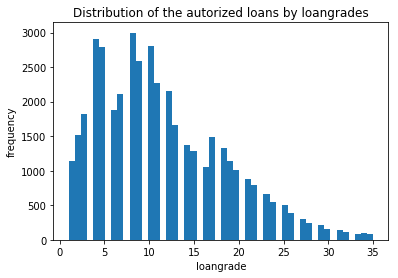

In [101]:
plt.hist(data['loangrade'],50)
plt.title('Distribution of the autorized loans by loangrades')
plt.xlabel('loangrade')
plt.ylabel('frequency')
plt.show()

In [82]:
# pensando en que fuera beta

#st.beta.fit(data['loangrade'])[3]

#pensando en que fuera erlang
print('erlang parameters for the distribution')
st.erlang.fit(data['loangrade'])
a=st.erlang.fit(data['loangrade'])[0]
loc=st.erlang.fit(data['loangrade'])[1]
scale=st.erlang.fit(data['loangrade'])[2]

erlang parameters for the distribution


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2455: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 6.300000000000001.
  RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2455: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 6.200000000000001.
  RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2455: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 5.833333333333334.
  RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2455: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 6.183333333333334.
  RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2455: RuntimeWarning: The shape parameter of the er

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2455: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.582885629874835.
  RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2455: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.430744696136694.
  RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2455: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.3388245880830514.
  RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2455: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.245317332665903.
  RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2455: RuntimeWarning: The shape parameter of the e

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2455: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.3185731992570244.
  RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2455: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.3204777024619414.
  RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2455: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.3188494424968367.
  RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2455: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.3168743033755845.
  RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2455: RuntimeWarning: The shape parameter of th

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2455: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value array(2.31883982).
  RuntimeWarning)


Text(0,0.5,'Data theorical quantiles')

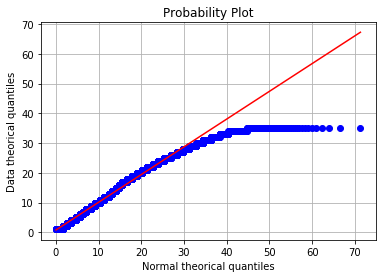

In [84]:
res = st.probplot(data['loangrade'],dist=st.erlang,sparams=(a,loc,scale), plot=plt)
plt.grid()
plt.xlabel('Normal theorical quantiles')
plt.ylabel('Data theorical quantiles')

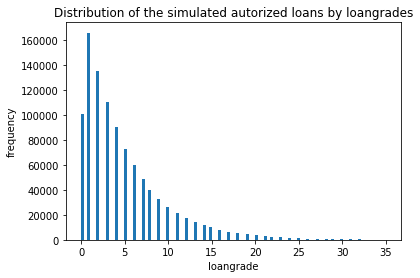

In [102]:
a=1
b=10
c=35
N=1000000
#r=st.binom.rvs(n=b,p=.7,size=N)
r=np.round(st.erlang.rvs(a=a,loc=loc,scale=scale,size=N))
r=[i for i in r if i<36]
#r=np.round(st.norm.rvs(loc=np.mean(data['loangrade']),scale=np.std(data['loangrade']),size=N))
#r=np.round(st.triang.rvs((b-a)/(c-a),a,c-a,N))

plt.hist(r,100)
plt.title('Distribution of the simulated autorized loans by loangrades')
plt.xlabel('loangrade')
plt.ylabel('frequency')
plt.show()


In [61]:
#simulated interest rates apliable to loans
z=np.random.uniform(np.min(data['int_rate']),np.max(data['int_rate']),len(r))
#simulated funded amounts of the loans
y=np.round(np.random.uniform(np.max(data['funded_amnt']),np.min(data['funded_amnt']),len(r)))

In [62]:
sim_loangrade=pd.DataFrame(r)
sim_int_rate=pd.DataFrame(z)
sim_amounts=pd.DataFrame(y)
sim=pd.concat([sim_loangrade,sim_int_rate,sim_amounts],axis=1)
#full table with the simulation
sim.columns=['loangrade','int_rate','funded_amnt']

In [63]:
#functions that according to the probability of default for every loan generates simulations of default
f=lambda x: int(np.random.choice(2,1,p=[1-default_probability_by_loangrade[x],default_probability_by_loangrade[x]]))

In [64]:
default_sim=list(map(lambda n:f(int(n)-1),sim['loangrade']))

In [100]:
print('the percentage of default loans is ',(np.count_nonzero(default_sim)/len(sim))*100,'%')

the percentage of default loans is  11.233753905989442 %


In [67]:
#simulated default loans
x=pd.DataFrame([sim.iloc[i,] for i in range(len(default_sim)) if default_sim[i]==1])

In [79]:
print('the percentage of loses in money is ',(sum(x['funded_amnt'])/sum(sim['funded_amnt'])*100),'%')

the percentage of loses in money is  11.268685075385267 %
